In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
%matplotlib inline
import re 
import math
import time

In [0]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
# import spacy
# # Need to load the large model to get the vectors
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [0]:
RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
DEVICE

device(type='cuda', index=0)

In [0]:
import os
import pandas as pd

# read the text file and add the column names
# read_file = pd.read_csv(r"./booksummaries.txt", sep='	', header=None)
read_file = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/final project/booksummaries.txt", sep='	', header=None)
read_file.columns = ['ID', 'm number', 'book name', 'author name', 'date', 'label', 'summary']

# clean data
read_file['label'] = read_file['label'].str.replace(r'/m/\S*\s', '')
read_file['label'] = read_file['label'].str.replace(r'{', '')
read_file['label'] = read_file['label'].str.replace(r'}', '')
read_file['label'] = read_file['label'].str.replace(r'novel', 'fiction', case = False)
read_file['label'] = read_file['label'].str.replace(r'\\u00e0\s+clef', '')

# select columns
new_file = read_file.loc[:, ['book name', 'label', 'summary']]

#delete the columns with no labels
new_file.dropna(axis = 0, how = 'any', inplace = True)
new_file = new_file.iloc[:, [0, 2, 1]]

new_file = new_file.reset_index(drop=True)

#output data as csv
#new_file.to_csv(r'/content/drive/My Drive/Colab Notebooks/final project/booksummries.csv', index=False)


In [8]:
new_file.head()

,book name,summary,label
0,Animal Farm,"Old Major, the old boar on the Manor Farm, ca...","""""Roman "", """"Satire"", """"Children's literature""..."
1,A Clockwork Orange,"Alex, a teenager living in near-future Englan...","""""Science Fiction"", """"fictionla"", """"Speculativ..."
2,The Plague,The text of The Plague is divided into five p...,"""""Existentialism"", """"Fiction"", """"Absurdist fic..."
3,A Fire Upon the Deep,The novel posits that space around the Milky ...,"""""Hard science fiction"", """"Science Fiction"", ""..."
4,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...","""""War fiction"", """"Roman """


In [9]:
new_file['label'] = (new_file['label'].str.contains('fiction', na=False, case = False, regex=False)).astype(int)
new_file.head()
#type(new_file.at[1, 'label'])


,book name,summary,label
0,Animal Farm,"Old Major, the old boar on the Manor Farm, ca...",1
1,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",1
2,The Plague,The text of The Plague is divided into five p...,1
3,A Fire Upon the Deep,The novel posits that space around the Milky ...,1
4,All Quiet on the Western Front,"The book tells the story of Paul Bäumer, a Ge...",1


In [0]:
#output data as csv
new_file.to_csv(r'./booksummries.csv', index=False)


In [0]:

categories = list(new_file['label'].values)
# all_labels = [ word for labels in categories for word in labels]
counts = Counter(categories)
# for i in categories:
#     counts.append((i, new_file['label'][i].sum()))
df_stats = pd.DataFrame(counts.items(), columns=['labels', '#books'])
df_stats = df_stats.sort_values(by = '#books', ascending = False)


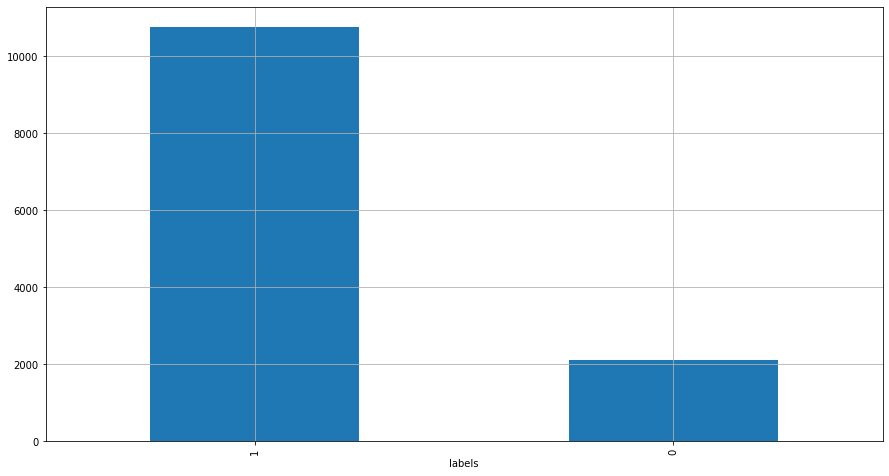

In [12]:
df_stats.plot(x='labels', y='#books', kind='bar', legend=False, grid=True, figsize=(15, 8))

  ## Encoding the Labels##




In [13]:
one_hot = pd.DataFrame(new_file['label'])
one_hot.head()

,label
0,1
1,1
2,1
3,1
4,1


## Split the words##

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


#def words_process(new_file):
book_summaries = new_file['summary']
summary_list = [summary for summary in book_summaries]
summary_num = len(summary_list)
#summaries = ''.join(summary_list)
print("the total number of books: {}\n".format(summary_num))

all_docs = []
i_index = 0
for doc in summary_list:
    # Tokenize the string into words
    tokens = word_tokenize(doc)
    # Remove non-alphabetic tokens, such as punctuation
    words = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    if len(words) >= 9:
      all_docs.append(words)
    else:
      print(i_index)
      one_hot = one_hot.drop(i_index, axis=0)
      print(one_hot.shape)
    i_index += 1
    #return all_docs, one_hot_delt

one_hot = one_hot.reset_index(drop=True)

the total number of books: 12841

1301
(12840, 1)
1708
(12839, 1)
2487
(12838, 1)
2553
(12837, 1)
2898
(12836, 1)
3243
(12835, 1)
3382
(12834, 1)
3561
(12833, 1)
4383
(12832, 1)
4663
(12831, 1)
4747
(12830, 1)
4912
(12829, 1)
4992
(12828, 1)
5317
(12827, 1)
5382
(12826, 1)
5440
(12825, 1)
5442
(12824, 1)
5550
(12823, 1)
5576
(12822, 1)
5581
(12821, 1)
5585
(12820, 1)
6609
(12819, 1)
7354
(12818, 1)
7372
(12817, 1)
7600
(12816, 1)
7805
(12815, 1)
8059
(12814, 1)
8104
(12813, 1)
8372
(12812, 1)
8386
(12811, 1)
8542
(12810, 1)
8543
(12809, 1)
8544
(12808, 1)
8545
(12807, 1)
8546
(12806, 1)
8547
(12805, 1)
8548
(12804, 1)
8549
(12803, 1)
8550
(12802, 1)
8551
(12801, 1)
8562
(12800, 1)
8563
(12799, 1)
8769
(12798, 1)
8770
(12797, 1)
8771
(12796, 1)
8772
(12795, 1)
8785
(12794, 1)
8821
(12793, 1)
9081
(12792, 1)
9089
(12791, 1)
9118
(12790, 1)
9128
(12789, 1)
9157
(12788, 1)
9159
(12787, 1)
9160
(12786, 1)
9244
(12785, 1)
9256
(12784, 1)
9347
(12783, 1)
9552
(12782, 1)
9656
(12781, 1)
9719
(

In [16]:
all_docs = all_docs[: len(all_docs)-1]

len(all_docs)
one_hot = one_hot.drop(len(all_docs)-1)
one_hot.shape

(12735, 1)

In [17]:
l1 = []
for i in range(len(all_docs)):
  l1.append(len(all_docs[i]))
#print(l1.index(6))
len_counts = Counter(l1)
df_len = pd.DataFrame(len_counts.items(), columns=['len', '#books'])
df_len = df_len.sort_values(by = 'len', ascending = True)
#print(min(l1))
df_len.head(17)

#one_hot = one_hot.reset_index(drop=True)

,len,#books
928,9,18
885,10,31
599,11,31
733,12,31
638,13,32
393,14,33
824,15,35
746,16,27
797,17,34
727,18,27


In [18]:
all_docs[10]

['nine',
 'years',
 'emperor',
 'paul',
 'walked',
 'desert',
 'blind',
 'ecological',
 'transformation',
 'dune',
 'reached',
 'point',
 'fremen',
 'living',
 'without',
 'stillsuits',
 'less',
 'arid',
 'climate',
 'started',
 'move',
 'sietches',
 'villages',
 'cities',
 'old',
 'ways',
 'erode',
 'pilgrims',
 'arrive',
 'experience',
 'planet',
 'imperial',
 'high',
 'council',
 'lost',
 'political',
 'initiative',
 'powerless',
 'control',
 'jihad',
 'paul',
 'twin',
 'young',
 'children',
 'leto',
 'ii',
 'ghanima',
 'sharing',
 'prescience',
 'concluded',
 'guardian',
 'alia',
 'succumbed',
 'possession',
 'one',
 'ancestors',
 'fear',
 'similar',
 'fate',
 'awaits',
 'alia',
 'also',
 'realize',
 'terraforming',
 'dune',
 'kill',
 'sandworms',
 'thus',
 'destroying',
 'source',
 'spice',
 'leto',
 'also',
 'fears',
 'like',
 'father',
 'trapped',
 'prescience',
 'possessed',
 'persona',
 'grandfather',
 'baron',
 'vladimir',
 'harkonnen',
 'alia',
 'fears',
 'mother',
 'return'

## outliners ##

## Using a Pre-Trained Embedding Layer

In [0]:
# import multiprocessing
# import sys
# import gensim
# from gensim.models import Word2Vec
# assert gensim.models.doc2vec.FAST_VERSION > -1, "This will be painfully slow otherwise."
# #from UtilWordEmbedding import TfidfEmbeddingVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# workers = multiprocessing.cpu_count()
# print('number of cpu: {}'.format(workers))

# word_model = Word2Vec(all_docs,
#                       min_count=1,
#                       size=300,
#                       window=5,
#                       workers=workers,
#                       iter=100)

In [20]:
from gensim.models import KeyedVectors

# Load word2vec model (trained on an enormous Google corpus)
# google_vecs = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)
google_vecs = KeyedVectors.load_word2vec_format('/content/drive/My Drive/Colab Notebooks/final project/GoogleNews-vectors-negative300.bin', binary = True)
embedding_dim_dim = google_vecs.vector_size

# def words_embedding(docs):
   
all_words = [ word for doc in all_docs for word in doc]
all_words_nodup = list(dict.fromkeys(all_words))

def words_embedding(doc):
    # Filter the list of vectors to include only those that Word2Vec has a vector for
    vector_list = [google_vecs[word] for word in doc if word in google_vecs.vocab]
    #vector_list = [word_model.wv[word] for word in doc]
    #google_vectors = np.asarray(vector_list)
    # Create a list of the words corresponding to these vectors
    words_filtered = [word for word in doc if word in google_vecs.vocab]
    #Zip the words together with their vector representations
    word_vec_zip = zip(words_filtered, vector_list)

    # Cast to a dict so we can turn it into a DataFrame
    word_vec_dict = dict(word_vec_zip)
    word_vec = pd.DataFrame.from_dict(word_vec_dict, orient='index')
    return word_vec

word_vec  = words_embedding(all_words_nodup)
word_vec_array = np.array(word_vec)
word_vec.shape

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(51241, 300)

In [21]:

len(all_words)
#word_vec_array.shape
word_vec_array

array([[ 0.2578125 ,  0.11669922,  0.19824219, ..., -0.0177002 ,
         0.02807617,  0.08203125],
       [-0.13085938,  0.00613403,  0.01385498, ...,  0.02685547,
         0.13183594,  0.02331543],
       [-0.01269531, -0.02941895, -0.24804688, ..., -0.03881836,
        -0.01977539,  0.13476562],
       ...,
       [-0.25195312,  0.05834961, -0.16210938, ...,  0.21777344,
        -0.07470703,  0.04150391],
       [ 0.01538086,  0.25      , -0.02172852, ..., -0.18457031,
         0.453125  ,  0.1484375 ],
       [ 0.01757812,  0.07421875, -0.03173828, ..., -0.41992188,
        -0.01660156,  0.18359375]])

In [0]:
word_vec_array = np.insert(word_vec_array, 0, np.zeros(word_vec_array.shape[1]), 0)


In [23]:
word_vec.tail()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
percenters,0.081055,-0.231445,0.029785,0.255859,0.227539,-0.207031,-0.267578,-0.015015,-0.130859,0.265625,0.304688,-0.100586,0.269531,0.419922,0.037598,-0.038330,-0.127930,0.355469,-0.047852,0.084961,0.038574,-0.170898,0.041504,-0.102051,-0.122559,0.102051,-0.219727,-0.002670,-0.022583,0.074219,0.226562,0.035400,0.110840,0.196289,0.146484,0.100098,-0.125000,0.147461,-0.042480,0.093750,...,-0.048340,-0.101562,-0.055664,-0.015564,-0.131836,0.098633,-0.168945,0.163086,-0.190430,-0.078613,-0.193359,-0.003876,-0.181641,-0.132812,-0.041016,-0.045410,0.271484,-0.142578,-0.075684,0.375000,-0.061523,-0.177734,0.002609,0.109375,-0.212891,-0.032227,-0.000622,0.048096,0.012512,-0.021240,0.089844,-0.062500,-0.082031,-0.263672,0.030518,-0.382812,0.171875,0.110352,0.023804,-0.072266
candlelit,0.039062,-0.004700,0.054932,0.410156,0.108887,-0.030273,-0.078613,-0.380859,0.090820,0.302734,-0.118652,-0.013062,0.000847,-0.039062,0.392578,0.194336,0.044434,-0.177734,0.009033,-0.186523,0.181641,0.238281,-0.164062,-0.158203,-0.014709,-0.023193,-0.147461,0.060303,-0.166016,-0.347656,-0.318359,-0.132812,-0.028320,-0.255859,-0.318359,-0.566406,-0.140625,-0.519531,-0.198242,-0.043945,...,-0.237305,-0.343750,0.063965,0.019409,-0.189453,0.113770,-0.125000,0.103516,0.101074,-0.066895,0.277344,0.122559,0.050537,0.183594,0.250000,0.021118,-0.014648,0.217773,-0.005768,-0.064941,0.212891,-0.129883,0.235352,-0.033936,0.048096,0.012146,-0.087402,0.108398,-0.095703,0.271484,-0.119141,-0.015625,-0.306641,0.320312,-0.332031,-0.090820,0.088867,-0.139648,-0.014587,0.455078
stillbirth,-0.251953,0.058350,-0.162109,0.396484,0.145508,0.341797,0.359375,0.212891,0.546875,0.086914,0.503906,0.032471,-0.088867,0.267578,0.170898,0.289062,0.000378,0.257812,-0.087402,-0.259766,0.113281,-0.515625,0.036377,-0.206055,-0.291016,-0.109863,0.041016,-0.041504,-0.267578,-0.457031,-0.137695,-0.124023,-0.180664,-0.562500,-0.294922,-0.181641,-0.201172,0.013733,-0.386719,0.168945,...,-0.302734,-0.060547,0.137695,0.265625,-0.396484,0.142578,-0.135742,-0.080078,-0.285156,-0.215820,-0.188477,0.291016,-0.380859,0.198242,-0.069336,0.157227,0.144531,0.431641,0.019531,-0.212891,-0.038818,-0.330078,0.105469,-0.032715,-0.152344,-0.261719,0.187500,-0.207031,-0.070312,0.078613,0.369141,-0.341797,-0.098145,0.063477,-0.214844,0.190430,-0.059570,0.217773,-0.074707,0.041504
bleaches,0.015381,0.250000,-0.021729,-0.189453,-0.347656,0.283203,-0.072754,-0.429688,-0.027100,0.172852,-0.112305,-0.402344,0.021362,0.339844,0.040283,0.259766,-0.052246,0.291016,0.115234,-0.138672,0.175781,-0.162109,0.126953,-0.083496,-0.304688,-0.170898,0.066895,0.179688,-0.071289,0.042236,-0.312500,0.115234,-0.225586,-0.041992,-0.150391,-0.312500,-0.050049,0.064941,-0.294922,-0.041748,...,-0.064453,-0.324219,-0.328125,-0.179688,0.335938,0.145508,-0.083984,-0.217773,0.142578,-0.224609,-0.067871,-0.019165,-0.161133,0.188477,0.365234,-0.031006,-0.168945,0.120117,-0.040039,-0.053711,0.079590,0.055176,0.116699,-0.020264,-0.033203,-0.055176,0.267578,0.015564,-0.234375,0.080566,-0.017334,-0.012695,-0.147461,0.108398,-0.292969,0.172852,0.181641,-0.184570,0.453125,0.148438
rapping,0.017578,0.074219,-0.031738,0.034912,0.163086,0.077148,-0.316406,-0.048584,-0.031006,0.110840,0.107422,-0.109375,0.104980,0.189453,-0.433594,-0.077148,-0.039795,-0.048096,-0.110840,-0.202148,-0.076172,0.275391,-0.106934,-0.083984,-0.367188,-0.047607,0.041260,-0.048096,0.238281,0.191406,-0.094238,0.057861,0.113770,0.156250,0.101074,-0.001442,0.183594,-0.065918,0.125977,0.067383,...,0.080566,0.074219,0.070312,-0.006714,-0.156250,-0.051025,-0.038574,-0.067871,-0.320312,0.210938,-0.053223,0.058350,0.306641,-0.048340,0.149414,-0.143555,-0.320312,-0.046631,-0.001335,-0.107910,0.095703,-0.049805,0.2099

In [24]:
word_vec_array

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2578125 ,  0.11669922,  0.19824219, ..., -0.0177002 ,
         0.02807617,  0.08203125],
       [-0.13085938,  0.00613403,  0.01385498, ...,  0.02685547,
         0.13183594,  0.02331543],
       ...,
       [-0.25195312,  0.05834961, -0.16210938, ...,  0.21777344,
        -0.07470703,  0.04150391],
       [ 0.01538086,  0.25      , -0.02172852, ..., -0.18457031,
         0.453125  ,  0.1484375 ],
       [ 0.01757812,  0.07421875, -0.03173828, ..., -0.41992188,
        -0.01660156,  0.18359375]])

In [0]:
# word_vec.to_csv(r'./wor_vec.csv', index=False)

In [0]:
#word_vec = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/final project/wor_vec.csv", header=None)

# Generate the integer vectors of all summaries

In [0]:
word_index = pd.DataFrame(index = word_vec.index)
wordlen_list = range(1, word_vec.shape[0]+1)
word_index['index'] = wordlen_list


In [28]:
wordlen_list[-1]

51241

In [29]:

def words_index(all_docs):
    all_words_index = []
    for doc in all_docs:
        inds = []
        for word in doc:
            try:
                inds.append(word_index.at[word, 'index'])
            except: 
                continue
            
        all_words_index.append(inds)
    return all_words_index

all_words_index = words_index(all_docs)
all_words_index[-1]

[562,
 293,
 9182,
 7438,
 264,
 2810,
 4276,
 1241,
 582,
 5188,
 5666,
 6523,
 7940,
 6637,
 582,
 5943,
 2799,
 3448,
 1615,
 23889,
 350,
 7490,
 2802,
 922,
 5814,
 3420,
 14491,
 5814,
 1296,
 1629,
 16143,
 23889,
 7534,
 11885,
 922,
 350,
 3784,
 1699,
 3248,
 15467,
 1811,
 173,
 28210,
 7727,
 3629,
 366,
 4619,
 16975,
 571,
 27657,
 28210,
 7727,
 3682,
 27657,
 4285,
 1039,
 4068,
 2302,
 16756,
 919,
 3729,
 343,
 4846,
 350,
 3903,
 7940,
 562,
 5675,
 2220,
 7490,
 1227,
 7988,
 1241,
 41235,
 1315,
 48540,
 48541,
 9148,
 4127,
 181,
 5006,
 8572,
 15940,
 1004,
 922,
 3738,
 1615,
 1629,
 949,
 2599,
 5901,
 163,
 5953,
 11979,
 11903,
 3023,
 165,
 2244,
 10094,
 5943,
 2799,
 51241,
 9280,
 922,
 551,
 39484,
 2229,
 92,
 949,
 8775,
 10520,
 562,
 1049,
 6556,
 12472,
 12472,
 1323,
 14,
 343,
 6556,
 6675,
 15583,
 3555,
 3289,
 6556,
 3389,
 3774,
 10839,
 173,
 12052,
 5340,
 3402,
 7793,
 779,
 34282,
 2058,
 125,
 43]

In [30]:
len(all_words_index)

12735

In [31]:
max(all_words_index[-1])

51241

In [32]:
l = []
for i in range(len(all_words_index)):
    l.append(len(all_words_index[i]))
l.index(max(l))
max(l)
#len(all_words_index)

4250

# Visualize the cluster of books

In [0]:
# import numpy as np
# def avg_doc_embedding(all_docs):
#     doc_vec = []
#     for doc in all_docs:
#         if len(doc) != 0:
#             vector =  words_embedding(doc)
#             doc_vec.append(np.mean(np.array(vector), axis=0))
    
#     summary_vec = np.array(doc_vec)
#     return summary_vec

# summary_vec = avg_doc_embedding(all_docs)

In [0]:
# summary_vec.shape

In [35]:
pip install gensim

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
#def tf_dif(doc):
all_text_docs = []
for doc in all_docs:
    print(len(doc))
    all_text_docs.append(" ". join(doc))
tf_idf_vect = TfidfVectorizer(stop_words='english', max_features=6000)
final_tf_idf = tf_idf_vect.fit_transform(all_text_docs)
tfidf_feat = tf_idf_vect.get_feature_names()
    #return final_tf_idf
# final_tf_idf
# tfidf_feat

Streaming output truncated to the last 5000 lines.
182
181
227
365
97
323
135
67
206
113
135
259
120
142
82
55
60
434
133
28
203
55
135
222
60
76
269
198
323
221
74
429
90
28
389
150
48
39
49
372
67
191
57
82
165
41
66
103
442
76
371
954
56
44
24
340
132
231
360
123
81
30
50
48
147
64
85
45
31
20
264
264
41
496
323
57
26
1668
38
446
176
55
344
55
66
297
32
369
35
238
71
223
77
21
60
422
84
282
66
370
132
67
64
54
260
191
82
473
277
438
118
36
124
561
46
347
46
189
93
45
48
43
105
522
126
514
236
216
335
124
200
233
21
332
116
86
978
270
94
39
86
89
238
519
169
124
156
20
79
855
315
28
42
169
267
525
126
81
156
110
229
52
579
251
42
158
41
397
39
548
39
358
36
181
54
128
86
24
627
248
384
68
26
402
450
120
86
213
38
435
100
64
398
117
225
259
33
418
64
340
185
528
81
595
168
222
55
47
37
66
62
50
63
151
241
334
317
203
656
71
658
50
200
67
92
53
76
292
94
40
210
818
189
166
47
62
457
70
658
223
40
203
225
97
304
178
204
116
755
425
146
539
37
37
471
67
34
62
253
99
36
178
352
287
417
46

In [37]:
tfidf_doc_vectors_ft = [] # the tfidf-ft for each summary  is stored in this list
row=0
errors=0
for doc in all_docs: # for each summary 
    doc_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the summary 
    for word in doc: # for each word in a summary 
        try:
            word_vec = google_vecs[word]
            #word_vec = word_model.wv[word]
            # obtain the tf_idf of a word in a summary 
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            #print(tfidf)
            doc_vec += (word_vec * tfidf)
            weight_sum += tfidf
        except:
            errors =+1
            pass
    doc_vec /= weight_sum
   

    tfidf_doc_vectors_ft.append(doc_vec)
    row += 1

tfidf_doc_vectors_ft_array = np.array(tfidf_doc_vectors_ft)
print('errors noted: '+str(errors))

errors noted: 1


In [38]:
tfidf_doc_vectors_ft_array.shape

(12735, 300)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X = tfidf_doc_vectors_ft_array
y = one_hot.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


Testing accuracy 0.8194095477386935
Testing F1 score: 0.7824810614200176


In [40]:
pip install adjustText

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


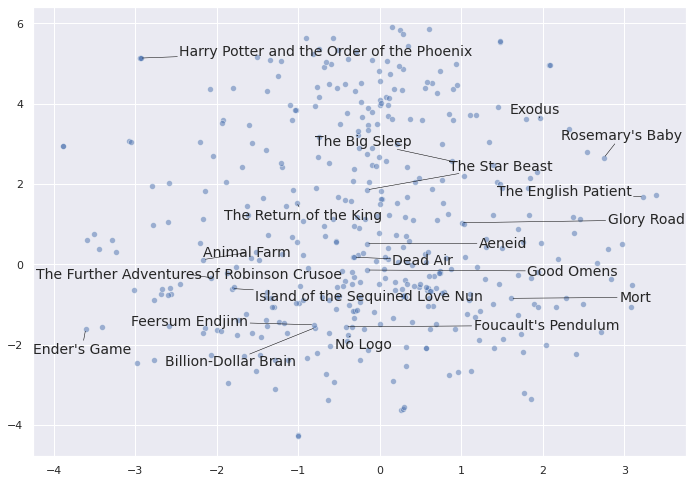

In [41]:
from sklearn.manifold import TSNE
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt
book_titles = new_file['book name']
titles_list = [title for title in book_titles]
titles_list = titles_list[:400]
def t_SNE_plot(df_data):
    # Initialize t-SNE
    tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

    # Use only 400 rows to shorten processing time
    tsne_df = tsne.fit_transform(df_data)#tsne.fit_transform(df_data[:400])

    sns.set()
    # Initialize figure
    fig, ax = plt.subplots(figsize = (11.7, 8.27))
    sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

    # Import adjustText, initialize list of texts

    texts = []
    data_to_plot = list(np.arange(0, 400, 20))#list(np.arange(0, 400, 40))

    # Append words to list
    for data in data_to_plot:
        texts.append(plt.text(tsne_df[data, 0], tsne_df[data, 1], titles_list[data], fontsize = 14))

    # Plot text using adjust_text (because overlapping text is hard to read)
    adjust_text(texts, force_points = 0.4, force_text = 0.4, 
                expand_points = (2,1), expand_text = (1,2),
                arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

    plt.show()

t_SNE_plot(tfidf_doc_vectors_ft_array[:400, :])    

## Padding sequences

In [42]:
max_Length = 0  
docs_length = []
for x in all_words_index:
    docs_length.append(len(x))
    if len(x) > max_Length:
        max_Length = len(x)

docs_length = np.array(docs_length)
max_Length

4250

In [43]:
np.where(docs_length<1)
#docs_length[3382]

(array([], dtype=int64),)

In [0]:
def pad_sequences(all_words_index, seq_length):
    
    # getting the correct rows x cols shape
    sequences = np.zeros((len(all_words_index), seq_length), dtype=int)
 
    # for each review, I grab that review and 
    for i, row in enumerate(all_words_index):
        if len(row)>0:
            sequences[i, 0:len(row)] =  np.array(row)[:seq_length]
    
    return sequences

In [45]:
sequences = pad_sequences(all_words_index, max_Length)

assert len(sequences)==len(all_words_index), "Sequences should have as many rows as reviews."
assert len(sequences[0])==max_Length, "Each sequence row should contain seq_length values."

print(sequences[-1])
np.where(sequences[-1] ==51242 )

[ 562  293 9182 ...    0    0    0]


(array([], dtype=int64),)

# Training, Validation, and Test Data

In [46]:
split_frac = 0.7

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(sequences)*split_frac)
train_x, remaining_x = sequences[:split_idx], sequences[split_idx:]
train_y, remaining_y = one_hot[:split_idx], one_hot[split_idx:]
train_len, remaining_len = docs_length[:split_idx], docs_length[split_idx:]

# train_x, remaining_x = sequences[:128], sequences[-256:]
# train_y, remaining_y = one_hot[:128], one_hot[-256:]
# train_len, remaining_len = docs_length[:128], docs_length[-256:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
val_len, test_len = remaining_len[:test_idx], remaining_len[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tSequences Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))


			Sequences Shapes:
Train set: 		(8914, 4250) 
Validation set: 	(1910, 4250) 
Test set: 		(1911, 4250)


In [47]:
test_len.min

<function ndarray.min>

In [0]:
# split_frac = 0.8

# ## split data into training, validation, and test data (features and labels, x and y)

# split_idx = int(len(all_words_index)*split_frac)
# train_x, remaining_x = all_words_index[:split_idx], all_words_index[split_idx:]
# train_y, remaining_y = one_hot[:split_idx], one_hot[split_idx:]
# #train_len, remaining_len = docs_length[:split_idx], docs_length[split_idx:]

# test_idx = int(len(remaining_x)*0.5)
# val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
# val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
# #val_len, test_len = remaining_len[:test_idx], remaining_len[test_idx:]

# ## print out the shapes of your resultant feature data
# print("\t\t\tSequences Shapes:")
# print("Train set: \t\t{}".format(len(train_x)), 
#       "\nValidation set: \t{}".format(len(val_x)),
#       "\nTest set: \t\t{}".format(len(test_)))

### Above only 2,0,1 because I only used  3 datasample to do all of these

# DataLoaders and Batching

In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset
# from torch.nn.utils.rnn import pad_sequence
# # create Tensor datasets


train_data = TensorDataset(torch.from_numpy(np.array(train_x)), torch.from_numpy(np.array(train_y)), torch.from_numpy(train_len)) 
valid_data = TensorDataset(torch.from_numpy(np.array(val_x)), torch.from_numpy(np.array(val_y)), torch.from_numpy(val_len))
test_data = TensorDataset(torch.from_numpy(np.array(test_x)), torch.from_numpy(np.array(test_y)), torch.from_numpy(test_len)) 

# # train_data = Dataset(train_x, train_y) #, torch.from_numpy(train_len)
# # valid_data = Dataset(val_x, val_y)
# # test_data = Dataset(test_x, test_y) 

# # dataloaders
batch_size = 64
# #RANDOM_SEED = 1

# def pad_collate(batch):
#   (xx, yy) = zip(*batch)
#   x_lens = [len(x) for x in xx]
#   y_lens = [len(y) for y in yy]

#   xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
#   yy_pad = pad_sequence(yy, batch_first=True, padding_value=0) , collate_fn=pad_collate

#   return xx_pad, yy_pad, x_lens, y_lens

# shuffling and batching data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, num_workers=4)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, num_workers=4)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, num_workers=4)

# LSTM model

In [0]:


# import numpy as np
# from torch import nn
# import torch.nn.functional as F


# # def kmax_pooling(x, dim, k):
# #     index = x.topk(k, dim = dim)[1].sort(dim = dim)[0]
# #     return x.gather(dim, index)

# class LSTMText(torch.nn.Module): 
#     def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, 
#                 linear_hidden_size, num_classes, freeze_embeddings=True):
#         super(LSTMText, self).__init__()
        
#         self.num_classes = num_classes
#         # 1. embedding layer
#         self.embedding = nn.Embedding(vocab_size, embedding_dim)
#         # set weights to pre-trained
#         self.embedding.weight = nn.Parameter(torch.from_numpy(word_vec_array)) # all vectors
#         # (optional) freeze embedding weights
#         if freeze_embeddings:
#             self.embedding.requires_grad = False

#         self.lstm =nn.LSTM( input_size = embedding_dim,
#                             hidden_size = hidden_size,
#                             num_layers = num_layers,
#                             bias = True,
#                             batch_first = False,
#                             # dropout = 0.5,
#                             bidirectional = True
#                             )

#         # self.dropout = nn.Dropout()
#         self.fc = nn.Sequential(
#             nn.Linear(hidden_size*2, linear_hidden_size),
#             nn.BatchNorm1d(linear_hidden_size),
#             nn.ReLU(inplace=True),
#             nn.Linear(linear_hidden_size, num_classes)
#         )
        
#          #activation function
#         self.act = nn.Sigmoid()
 
#     def forward(self, text):
      
#         #text = [batch size,sent_length]
#         embedded = self.embedding(text)
#         #embedded = [batch size, sent_len, emb dim]
#         print(embedded.shape)
#         #packed sequence
#         #packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, batch_first=True)
        
#         #packed_output, (hidden, cell) = self.lstm(packed_embedded)
#         packed_output = self.lstm(embedded) #.view(len(text), 1, -1)
#         #hidden = [batch size, num layers * num directions,hid dim]
#         #cell = [batch size, num layers * num directions,hid dim]
        
#         #concat the final forward and backward hidden state
#         #hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
                
#         #hidden = [batch size, hid dim * num directions]
#         #logits=self.fc(hidden)
#         logits=self.fc(packed_output) #.view(len(text),-1)

#         #Final activation function
#         probas=self.act(logits, dim = 1)

#         return logits, probas


In [0]:
import numpy as np
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
# attention layer code inspired from: https://discuss.pytorch.org/t/self-attention-on-words-and-masking/5671/4
class Attention(nn.Module):
    def __init__(self, hidden_size, batch_first=False):
        super(Attention, self).__init__()

        self.hidden_size = hidden_size
        self.batch_first = batch_first

        self.att_weights = nn.Parameter(torch.Tensor(1, hidden_size), requires_grad=True)

        stdv = 1.0 / np.sqrt(self.hidden_size)
        for weight in self.att_weights:
            nn.init.uniform_(weight, -stdv, stdv)

    def get_mask(self):
        pass

    def forward(self, inputs, lengths):
        if self.batch_first:
            batch_size, max_len = inputs.size()[:2]
        else:
            max_len, batch_size = inputs.size()[:2]
        print(inputs.size())
        print(self.att_weights.permute(1, 0).unsqueeze(0).repeat(batch_size, 1, 1).size())    
        # apply attention layer
        weights = torch.bmm(inputs,
                            self.att_weights  # (1, hidden_size)
                            .permute(1, 0)  # (hidden_size, 1)
                            .unsqueeze(0)  # (1, hidden_size, 1)
                            .repeat(batch_size, 1, 1) # (batch_size, hidden_size, 1)
                            )
    
        attentions = torch.softmax(F.relu(weights.squeeze()), dim=-1)

        # create mask based on the sentence lengths
        mask = torch.ones(attentions.size(), requires_grad=True).cuda()
        for i, l in enumerate(lengths):  # skip the first sentence
            if l < max_len:
                mask[i, l:] = 0

        # apply mask and renormalize attention scores (weights)
        masked = attentions * mask
        _sums = masked.sum(-1).unsqueeze(-1)  # sums per row
        
        attentions = masked.div(_sums)

        # apply attention weights
        weighted = torch.mul(inputs, attentions.unsqueeze(-1).expand_as(inputs))

        # get the final fixed vector representations of the sentences
        representations = weighted.sum(1).squeeze()

        return representations, attentions

In [0]:


import numpy as np
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# def kmax_pooling(x, dim, k):
#     index = x.topk(k, dim = dim)[1].sort(dim = dim)[0]
#     return x.gather(dim, index)

class LSTMText1(torch.nn.Module): 
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, 
                linear_hidden_size, num_classes, freeze_embeddings=True):
        super(LSTMText1, self).__init__()
        
        
#         self.num_classes = num_classes
        # 1. embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # set weights to pre-trained
        self.embedding.weight = nn.Parameter(torch.from_numpy(word_vec_array)) # all vectors
        # (optional) freeze embedding weights
        if freeze_embeddings:
            self.embedding.requires_grad = False

        self.lstm =nn.LSTM( input_size = embedding_dim,
                            hidden_size = hidden_size,
                            num_layers = num_layers,
                            bias = True,
                            batch_first = True,
                            dropout = 0.5,
                            bidirectional = True
                            )
        self.atten = Attention(hidden_size*2, batch_first=True) # 2 is bidrectional
        # self.dropout = nn.Dropout()
        self.fc = nn.Sequential(
            nn.Linear(hidden_size*2, linear_hidden_size),
            nn.BatchNorm1d(linear_hidden_size),
            nn.ReLU(inplace=True),
            nn.Linear(linear_hidden_size, num_classes)
        )
        
         #activation function
        self.act = nn.Sigmoid()
 
    def forward(self, text, text_lengths):
      
        #text = [batch size,sent_length]
        embedded = self.embedding(text)
        #embedded = [batch size, sent_len, emb dim]
        print(embedded.shape)
        #packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths, batch_first=True, enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        text, text_lengths = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        #packed_output = self.lstm(embedded) #.view(len(text), 1, -1)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
        text, _ = self.atten(text, text_lengths) 
        #conv_out = kmax_pooling((content_out),2,self.opt.kmax_pooling)
        #concat the final forward and backward hidden state
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
                
        #hidden = [batch size, hid dim * num directions]
        logits=self.fc(hidden)
        #logits=self.fc(packed_output) #.view(len(text),-1)

        #Final activation function
        probas=self.act(logits)

        return logits, probas


# Instantiate the network

In [58]:
# vocab_size, embedding_dim, hidden_size, num_layers, 
#                  bidirectional, dropout, linear_hidden_size, num_classes
    
# Instantiate the model with hyperparameters
import random
vocab_size = word_vec.shape[0]+1#len(google_vecs.vocab)
#num_classes = 1 # binary class (1 or 0)
embedding_dim = google_vecs.vector_size # 300-dim vectors
hidden_size = 256 #LSTM hidden size
num_layers=2 #LSTM layers
linear_hidden_size = 200 # units number of full connected 
num_classes = 1

# random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)  ###revise


# torch.nn.init.xavier_uniform(m.weight.data)

model = LSTMText1(vocab_size, embedding_dim, hidden_size, num_layers, 
                 linear_hidden_size, num_classes)

model = model.float()

print(model)
model = model.to(DEVICE)

#No. of trianable parameters
def count_parameters(model):
    return sum(m.numel() for m in model.parameters() if m.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')


LSTMText1(
  (embedding): Embedding(301, 300)
  (lstm): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (atten): Attention()
  (fc): Sequential(
    (0): Linear(in_features=512, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=200, out_features=1, bias=True)
  )
  (act): Sigmoid()
)
The model has 18,196,057 trainable parameters


In [0]:
NUM_EPOCHS = 15
GRAYSCALE = False
intial_lr = 0.001

criterion = nn.BCELoss()       
optimizer = torch.optim.Adam(model.parameters(), lr=intial_lr)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,
                                                   gamma=0.1,
                                                   last_epoch=-1)


# Define loss function and evaluation parameters and Train

In [0]:
def compute_accuracy_and_loss(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    loss = 0.
    for i, (features, targets, features_len) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)
        features_len = features_len.to(device)
        print('features_len', features_len.shape)
        print('targets', targets.shape)
        print('features', features.shape)
        logits, probas = model(features, features_len)
        loss += criterion(probas, targets.float()).item()
        predicted_labels = (probas > 0.5).cpu().numpy()
        num_examples += targets.size(0)
        
    average_loss = loss/ num_examples
    accuracy = accuracy_score(targets.cpu().numpy(), predicted_labels)
    #ACU = roc_auc_score(targets.cpu().numpy(), predicted_labels)
    f_measure = precision_recall_fscore_support(targets.cpu().numpy(), predicted_labels,average='weighted')
    return accuracy, average_loss, f_measure

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
import torch.nn.functional as F


    

start_time = time.time()
train_acc_lst, valid_acc_lst = [], []
train_loss_lst, valid_loss_lst = [], []

for epoch in range(NUM_EPOCHS):
    
    model.train()
    
    for batch_idx, (features, targets, features_len) in enumerate(train_loader): #, 

        ### PREPARE MINIBATCH
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
        features_len = features_len.to(DEVICE)
#         features, features_lengths = batch.features
#         targets = batch.targets
        print(features_len)
        #retrieve text and no. of words
        #print(features_len)
            
        ### FORWARD AND BACK PROP
        features = features.view(features.size(0), -1)
        logits, probas = model(features, features_len)
        cost = criterion(probas, targets.float())
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        # model.apply(weights_init)
        ### LOGGING
        if not batch_idx % 20:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')
        if not epoch % 5:
            scheduler.step()
        
    # no need to build the computation graph for backprop when computing accuracy
    model.eval()
    with torch.set_grad_enabled(False):
        train_acc, train_loss, train_f_measure = compute_accuracy_and_loss(model, train_loader, device=DEVICE)
        valid_acc, valid_loss, valid_f_measure = compute_accuracy_and_loss(model, valid_loader, device=DEVICE)
        train_acc_lst.append(train_acc)
        valid_acc_lst.append(valid_acc)
        train_loss_lst.append(train_loss)
        valid_loss_lst.append(valid_loss)
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Validation Acc.: {valid_acc:.2f}%')

    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')
    print('the precision_recall_fscore_support of F-score_train: ', train_f_measure)
    print('the precision_recall_fscore_support of F-score_val: ', valid_f_measure)




Streaming output truncated to the last 5000 lines.
         202,   14,  687,   65,  605,   32,  113,  339,   66,   44,  229,   53,
         345,   68,  309,   15,   21,  459,  101,  203,   85,   24,   69,  597,
         176,   63,  207,  293,  191,  147,   35,   19,   56,  267,   95,  224,
         246,   39,  141,   48,  317,   88,  477,  623,   51,  585,  393,  715,
          86,   63,   20,   31,  253,  737,  318,   34,  330,   54,  890,  340,
         137,  107,  127,  121,   98,   98,   20,  253,  359, 2135,  141,   19,
          37,  195,  169,   19,  419, 4250,   59,   48,   29,  106,  140,  185,
          68,  268,  218,  299,  301,   56,   74,   28,  143,   38,  338,  288,
         405,  114,  291,  319,  422,  295,  246,  613], device='cuda:0')
torch.Size([128, 4250, 300])
torch.Size([128, 4250, 512])
torch.Size([128, 512, 1])
tensor([ 231,   91,  248,  149,  199,  750,  154,  183,  197,   59,  607, 1001,
         117,  197,  738,   20,  141,  102,  105,  269,  293,   55,  29

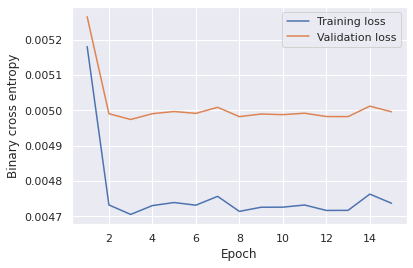

In [62]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), valid_loss_lst, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Binary cross entropy')
plt.xlabel('Epoch')
plt.show()

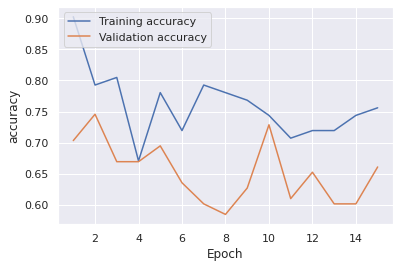

Training accuracy: 0.76%
Validation accuracy: 0.66%


In [63]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), valid_acc_lst, label='Validation accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()
print(f'Training accuracy: {train_acc_lst[-1]:.2f}%')
print(f'Validation accuracy: {valid_acc_lst[-1]:.2f}%')

In [64]:

model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss, test_f_measure = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

features_len torch.Size([128])
targets torch.Size([128, 1])
features torch.Size([128, 4250])
torch.Size([128, 4250, 300])
torch.Size([128, 1229, 512])
torch.Size([128, 512, 1])
features_len torch.Size([128])
targets torch.Size([128, 1])
features torch.Size([128, 4250])
torch.Size([128, 4250, 300])
torch.Size([128, 3011, 512])
torch.Size([128, 512, 1])
features_len torch.Size([128])
targets torch.Size([128, 1])
features torch.Size([128, 4250])
torch.Size([128, 4250, 300])
torch.Size([128, 2452, 512])
torch.Size([128, 512, 1])
features_len torch.Size([128])
targets torch.Size([128, 1])
features torch.Size([128, 4250])
torch.Size([128, 4250, 300])
torch.Size([128, 930, 512])
torch.Size([128, 512, 1])
features_len torch.Size([128])
targets torch.Size([128, 1])
features torch.Size([128, 4250])
torch.Size([128, 4250, 300])
torch.Size([128, 1065, 512])
torch.Size([128, 512, 1])
features_len torch.Size([128])
targets torch.Size([128, 1])
features torch.Size([128, 4250])
torch.Size([128, 4250, 

In [0]:
for i, (features, targets, features_len) in enumerate(test_loader):
            
#         features = features.to(device)
#         targets = targets.to(device)
#         features_len = features_len.to(device)
        print('features_len', features_len.shape)
        print('targets', targets.shape)
        print('features', features.shape)